Avocado dataset



Avacado is a fruit consumed by people heavily in United states. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression

In [1]:
#Import Libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data

avocado_dataset=pd.read_csv("avocado.csv", parse_dates=['Date'])

Identification of variables and data types

In [3]:
#info of data

avocado_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [4]:
avocado_dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_dataset.count()

Unnamed: 0      18249
Date            18249
AveragePrice    18249
Total Volume    18249
4046            18249
4225            18249
4770            18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

In [6]:
avocado_dataset["Unnamed: 0"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [7]:
avocado_dataset["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
avocado_dataset["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [9]:
avocado_dataset["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [79]:
#To check the shape of the dataset

avocado_dataset.shape

(18249, 14)

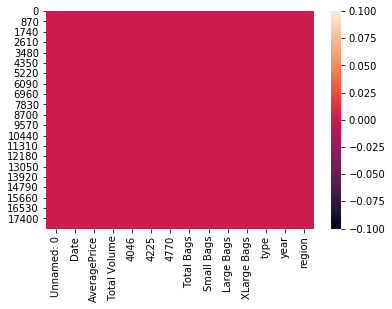

In [12]:
#check null or missing values

sns.heatmap(avocado_dataset.isnull())

In [13]:
#Check the stats ( if 75% and max difference is more then outliers are present) 
avocado_dataset.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
#Replace index

avocado_dataset.set_index('Unnamed: 0', inplace=True)

In [15]:
avocado_dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,,,,,,,,,,,,,
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Graphical/non Graphical Analysis

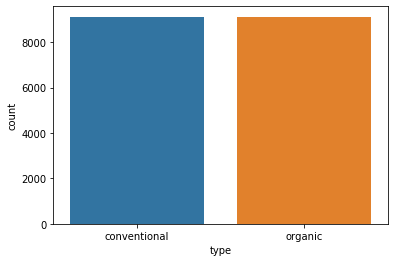

In [16]:
sns.countplot(x='type',data=avocado_dataset)

In [17]:
avocado_dataset_Type['type'].count()

type
conventional    9126
organic         9123
Name: type, dtype: int64

In [18]:
avocado_dataset_Year['year'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: year, dtype: int64

In [19]:
avocado_dataset_Region['region'].count()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [20]:
# Dataset Correlation

avocado_dataset.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


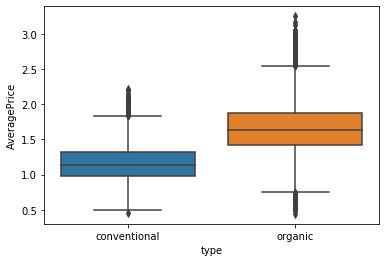

In [21]:
sns.boxplot(x="type", y="AveragePrice",data=avocado_dataset);

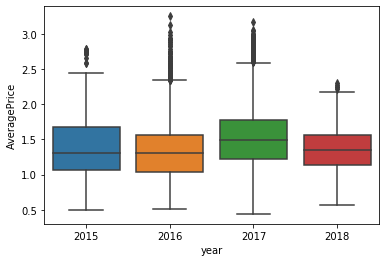

In [22]:
sns.boxplot(x="year", y="AveragePrice",data=avocado_dataset);

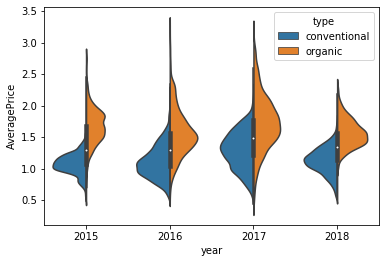

In [23]:
sns.violinplot(x="year", y="AveragePrice", hue="type", data=avocado_dataset,split=True)

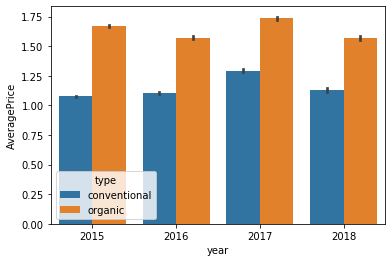

In [24]:
sns.barplot(x="year", y="AveragePrice",hue="type",data=avocado_dataset)

In [25]:
#check volume based on year

data_2015=avocado_dataset[avocado_dataset.year==2015]
data_2016=avocado_dataset[avocado_dataset.year==2016]
data_2017=avocado_dataset[avocado_dataset.year==2017]
data_2018=avocado_dataset[avocado_dataset.year==2018]

total_volume_2015 = data_2015["Total Volume"].sum()
total_volume_2016 = data_2016["Total Volume"].sum()
total_volume_2017 = data_2017["Total Volume"].sum()
total_volume_2018 = data_2018["Total Volume"].sum()

print("Volume in 2015 : ",total_volume_2015)
print("Volume in 2016 : ",total_volume_2016)
print("Volume in 2017 : ",total_volume_2017)
print("Volume in 2018 : ",total_volume_2018)

Volume in 2015 :  4385468662.04
Volume in 2016 :  4820889891.83
Volume in 2017 :  4934305699.27
Volume in 2018 :  1382738340.2600002


In [26]:
#Organic : check volume based on year

org_avocado_dataset=avocado_dataset[avocado_dataset.type=="organic"]
data_2015=org_avocado_dataset[org_avocado_dataset.year==2015]
data_2016=org_avocado_dataset[org_avocado_dataset.year==2016]
data_2017=org_avocado_dataset[org_avocado_dataset.year==2017]
data_2018=org_avocado_dataset[org_avocado_dataset.year==2018]

total_volume_org_2015 = data_2015["Total Volume"].sum()
total_volume_org_2016 = data_2016["Total Volume"].sum()
total_volume_org_2017 = data_2017["Total Volume"].sum()
total_volume_org_2018 = data_2018["Total Volume"].sum()

print("Volume in 2015 : ",total_volume_org_2015)
print("Volume in 2016 : ",total_volume_org_2016)
print("Volume in 2017 : ",total_volume_org_2017)
print("Volume in 2018 : ",total_volume_org_2018)

Volume in 2015 :  88869426.35
Volume in 2016 :  130640078.78000002
Volume in 2017 :  168139905.83
Volume in 2018 :  48532271.129999995


In [27]:
#Conventional :  : check volume based on year

con_avocado_dataset=avocado_dataset[avocado_dataset.type=="conventional"]
data_2015=con_avocado_dataset[con_avocado_dataset.year==2015]
data_2016=con_avocado_dataset[con_avocado_dataset.year==2016]
data_2017=con_avocado_dataset[con_avocado_dataset.year==2017]
data_2018=con_avocado_dataset[con_avocado_dataset.year==2018]

total_volume_org_2015 = data_2015["Total Volume"].sum()
total_volume_org_2016 = data_2016["Total Volume"].sum()
total_volume_org_2017 = data_2017["Total Volume"].sum()
total_volume_org_2018 = data_2018["Total Volume"].sum()

print("Volume in 2015 : ",total_volume_org_2015)
print("Volume in 2016 : ",total_volume_org_2016)
print("Volume in 2017 : ",total_volume_org_2017)
print("Volume in 2018 : ",total_volume_org_2018)

Volume in 2015 :  4296599235.690001
Volume in 2016 :  4690249813.05
Volume in 2017 :  4766165793.440001
Volume in 2018 :  1334206069.13


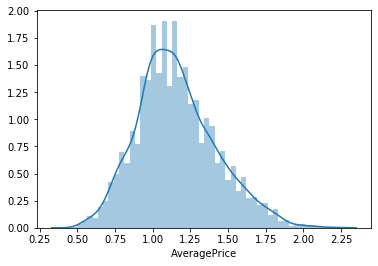

In [28]:
sns.distplot(con_avocado_dataset.AveragePrice,label="Average Price");

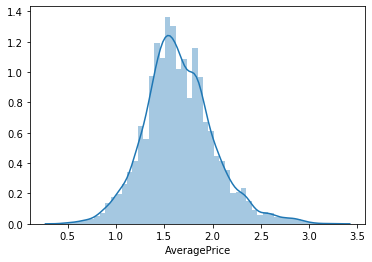

In [29]:
sns.distplot(org_avocado_dataset.AveragePrice,label="Average Price");

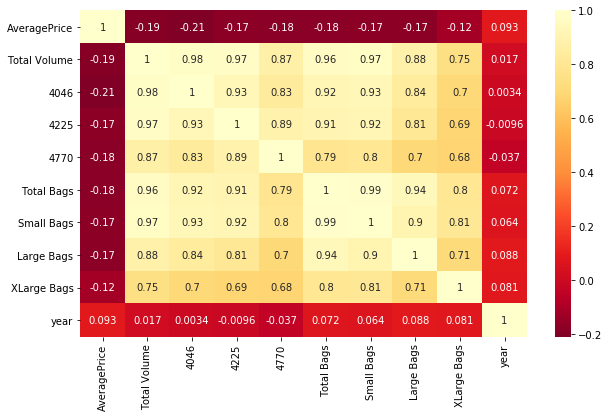

In [30]:
#Correlation

cor=avocado_dataset.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='YlOrRd_r',annot=True)

In [31]:
con_avocado_dataset.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,9126.000000,9.126000e+03,9.126000e+03,9.126000e+03,9.126000e+03,9.126000e+03,9.126000e+03,9.126000e+03,9126.000000,9126.000000
mean,1.158040,1.653213e+06,5.786116e+05,5.748053e+05,4.540580e+04,4.543901e+05,3.467218e+05,1.014577e+05,6210.635065,2016.147929
std,0.263041,4.747892e+06,1.742501e+06,1.655582e+06,1.485750e+05,1.358741e+06,1.027420e+06,3.374545e+05,24631.904345,0.939968
min,0.460000,3.369968e+04,7.206000e+01,1.518000e+03,0.000000e+00,3.047170e+03,1.119180e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.989086e+05,3.193538e+04,5.091885e+04,5.568800e+02,5.724793e+04,4.329632e+04,2.308108e+03,0.000000,2015.000000
50%,1.130000,4.083255e+05,1.047067e+05,1.361147e+05,6.035945e+03,9.889676e+04,7.572726e+04,1.458263e+04,122.255000,2016.000000
75%,1.320000,1.030992e+06,3.647169e+05,4.151696e+05,2.118183e+04,2.916959e+05,2.043966e+05,5.991083e+04,2409.215000,2017.000000
max,2.220000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [32]:
org_avocado_dataset.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,9123.000000,9.123000e+03,9123.000000,9123.000000,9123.000000,9.123000e+03,9123.000000,9123.000000,9123.000000,9123.000000
mean,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,2.481765e+04,17613.474543,7202.982659,1.197164,2016.147868
std,0.363502,1.424069e+05,23501.552849,45729.357670,1117.611580,8.185146e+04,60820.415023,26621.208199,14.727286,0.939961
min,0.440000,8.456000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2015.000000
25%,1.420000,4.779910e+03,157.915000,675.560000,0.000000,1.685915e+03,776.625000,4.440000,0.000000,2015.000000
50%,1.630000,1.083576e+04,911.460000,3082.620000,0.000000,5.096240e+03,2863.330000,387.550000,0.000000,2016.000000
75%,1.870000,3.008704e+04,4354.415000,9880.200000,30.270000,1.437976e+04,9962.555000,2991.820000,0.000000,2017.000000
max,3.250000,1.814930e+06,361996.840000,680037.450000,26765.780000,1.124622e+06,944572.500000,561530.390000,510.410000,2018.000000


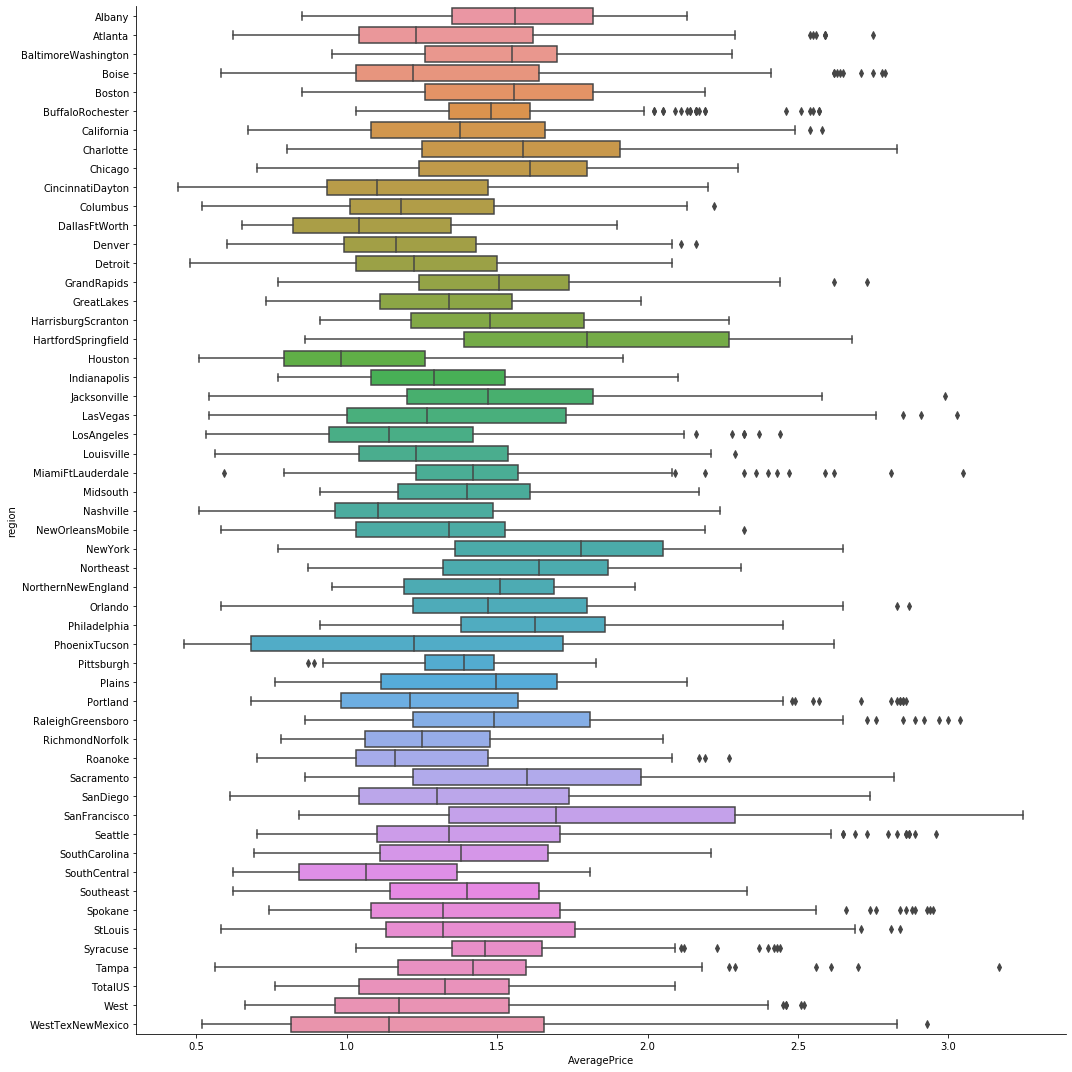

In [33]:
#plot the range of average prices per city

sns.catplot(x='AveragePrice', y='region', data=avocado_dataset, height=15, kind='box');

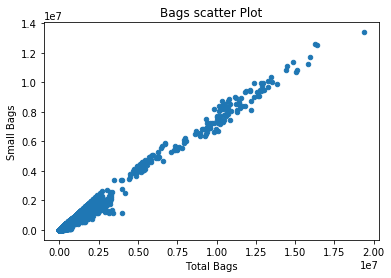

In [34]:
#Scatter plot

avocado_dataset.plot(kind="scatter", x="Total Bags", y="Small Bags")
plt.xlabel("Total Bags")
plt.ylabel("Small Bags")
plt.title("Bags scatter Plot")
plt.show()

Handle Dates

In [35]:
# adding to dataset
avocado_dataset['day']=avocado_dataset.Date.dt.strftime('%d')
avocado_dataset['month']=avocado_dataset.Date.dt.strftime('%m')
# delete old date column
avocado_dataset.drop(["Date"],axis=1,inplace=True)

#convert objects to int
avocado_dataset.month = avocado_dataset.month.values.astype(int)
avocado_dataset.day = avocado_dataset.day.values.astype(int)
avocado_dataset.head ()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
Unnamed: 0,,,,,,,,,,,,,,
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [36]:
avocado_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  day           18249 non-null  int32  
 13  month         18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(2)
memory usage: 2.6+ MB


In [38]:
avocado_dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
Unnamed: 0,,,,,,,,,,,,,,
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


In [39]:
#Label Encoder for object datatype 

from sklearn import preprocessing
processed_df = avocado_dataset.copy()
le = preprocessing.LabelEncoder()
processed_df['region'] = le.fit_transform(processed_df['region']).astype(int)
processed_df['type'] = le.fit_transform(processed_df['type']).astype(int)
new_avocado_dataset=processed_df

In [40]:
new_avocado_dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,month
Unnamed: 0,,,,,,,,,,,,,,
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29,11


In [41]:
new_avocado_dataset.type.unique()

array([0, 1])

In [42]:
new_avocado_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  day           18249 non-null  int32  
 13  month         18249 non-null  int32  
dtypes: float64(9), int32(4), int64(1)
memory usage: 1.8 MB


In [43]:
new_avocado_dataset.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [44]:
#remove outliers

from scipy.stats import zscore
z=abs(zscore(new_avocado_dataset))
print(new_avocado_dataset.shape)
new_avocado_dataset = new_avocado_dataset.loc[(z < 3).all(axis=1)]
print(new_avocado_dataset.shape)

(18249, 14)
(17651, 14)


Predication Analysis: predict Average Price

In [45]:
X=new_avocado_dataset.drop(["AveragePrice"],axis=1)
Y=new_avocado_dataset["AveragePrice"]

In [46]:
print(X.shape)
print(Y.shape)

(17651, 13)
(17651,)


In [48]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score

In [49]:
#Split data to test and train data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=160)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=23)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=23)
RFR=RandomForestRegressor(random_state=23)
GBR=GradientBoostingRegressor(random_state=23)

In [53]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,r2_score,mean_squared_error
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= cross_val_score(model,X,Y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.44383498985608827
Mean_Squared_Error = 0.08212475542353947
Cross_Val_Score =  -0.005382764197797219


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.13255295268882905
Mean_Squared_Error = 0.1280894614079872
Cross_Val_Score =  -0.9194362712781554


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.44383480004598463
Mean_Squared_Error = 0.08212478345138742
Cross_Val_Score =  -0.005404297561918925


******

In [55]:
#Compare models

result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE})
result

,Model,R2_score,Mean_Squared_Error
0,LinearRegression,0.443835,0.082125
1,Lasso,0.132553,0.128089
2,Ridge,0.443835,0.082125
3,ElasticNet,0.132555,0.128089
4,DecisionTreeRegressor,0.758671,0.035635
5,KNeighborsRegressor,0.658947,0.050361
6,AdaBoostRegressor,0.557959,0.065273
7,RandomForestRegressor,0.883139,0.017256
8,GradientBoostingRegressor,0.747194,0.037330


In [80]:
from sklearn.externals import joblib
joblib.dump(RFR,'Avacado_rfcfile.obj')

['Avacado_rfcfile.obj']

Predication Analysis: predict Region

In [56]:
X=new_avocado_dataset.drop(["region"],axis=1)
Y=new_avocado_dataset["region"]

In [57]:
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,day,month
Unnamed: 0,,,,,,,,,,,,,
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,29,11


In [58]:
Y.head()

Unnamed: 0
0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=97)

In [60]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(12355, 13) (5296, 13)
(12355,) (5296,)


In [61]:
#Split data to test and train data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [62]:

KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=8)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=20,random_state=8)
GBC=GradientBoostingClassifier(random_state=8)
ABC=AdaBoostClassifier(random_state=8)
ETC=ExtraTreesClassifier(random_state=8)

In [72]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
#models.append(('GradientBoostingClassifier', GBC))
#models.append(('ExtraTreesClassifier',ETC))
#models.append(('AdaBoostClassifier',ABC))

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [74]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    #false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    #print ('roc_auc_score = ',roc_auc)
    #rocscore.append(roc_auc*100)
    #print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    #plt.figure(figsize=(10,40))
    #plt.subplot(911)
    #plt.title(name)
    #print(sns.heatmap(cm,annot=True))
    #plt.subplot(912)
    #plt.title(name)
    #plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    #plt.plot([0,1],[0,1],'r--')
    #plt.legend(loc='lower right')
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #print('\n\n')

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.6463368580060423


Cross_Val_Score =  0.501379568108977


classification_report
               precision    recall  f1-score   support

           0       0.54      0.78      0.64        97
           1       0.60      0.63      0.61       107
           2       0.74      0.75      0.74       100
           3       0.72      0.73      0.72       107
           4       0.67      0.75      0.71        99
           5       0.64      0.48      0.55       111
           6       0.70      0.78      0.74        77
           7       0.69      0.82      0.75       110
           8       0.84      0.89      0.86        93
           9       0.51      0.62      0.56        82
          10       0.44      0.52      0.48 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8, splitter='best')


Accuracy_score =  0.7915407854984894


Cross_Val_Score =  0.6284601169718221


classification_report
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        97
           1       0.66      0.66      0.66       107
           2       0.90      0.89      0.89       100
           3       0.77      0.80      0.79       107
           4       0.81      0.83      0.82        99
           5       0.75      0.69      0.72       111
           6       0.90      0.95      0.92        77
           7       0.84      0.78      

In [76]:
#Compare the models

result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,64.633686,50.137957
1,SVC,26.321752,25.770750
2,LogisticRegression,17.371601,14.576579
3,DecisionTreeClassifier,79.154079,62.846012
4,GaussianNB,30.268127,25.141300
5,RandomForestClassifier,89.293807,73.882091


In [78]:
#Save the model

from sklearn.externals import joblib
joblib.dump(RFR,'Avacado_rfcfile.obj')

['Avacado_rfcfile.obj']